# Import Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import KFold
import random
from sklearn.model_selection import cross_validate

# Import Data

In [2]:
data =pd.read_csv('combined_50_meters_till_feb21.csv')

## Data Cleaning

In [3]:
'''
Features
RH: Relative Humidity in Percent as measured by PurpleAir
PM25cfatm: AB channel averaged lower cf PM2.5 in ug/m3
TempC: Temperature in Celcius as measured by PurpleAir

Label
PM25FM: FEM or FRM PM2.5 in ug/m3

'''
# data = data[['PM25cfatm','TempC','RH','PM25FM']]
data.describe()
data.head()

# Reference to BAse Model for comparison
# PM2.5=0.524×PAcf_1−0.0862×RH+5.75
data['PM2.5 Ref Model Prediction'] = (data['PM2.5 (ATM)_a'] *0.524) - (0.0862*data['Humidity_a']) + 5.75


In [4]:
# Rearrange Data
data = data[['Temperature_a', 'Humidity_a','PM2.5 (ATM)_a','Sample Measurement','State', 'County', 'sensid', 'monid', 'latmon', 'lonmon','PM2.5 Ref Model Prediction']]

In [5]:
data.shape

(26968, 11)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(26968, 11)

## Split data into Test and Train

In [8]:
x = np.array(data.iloc[:,0:3])
y = np.array(data.iloc[:,3])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
name=['Base Model']
score =[]
# average =[]
# maximum = []
# minimum = []
seed = 1
# scoring = 'accuracy'
# scoring = 'explained_variance'
# scoring = 'neg_mean_squared_error'
# scoring = 'neg_mean_absolute_percentage_error'
# scoring = 'neg_mean_absolute_error'
# scoring = 'r2'
scoring =['neg_mean_squared_error','neg_mean_absolute_error','r2']

# Old Model

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_old = 0.524*X_test[:,2] - 0.0862*X_test[:,1] + 5.75
r2_old = r2_score(y_test,pred_old)
mae_old = mean_absolute_error(y_test,pred_old)
rmse_old = mean_squared_error(y_test,pred_old)

# CART - Classification and Regression Tree

In [11]:
# create a regressor object
regressor = DecisionTreeRegressor() 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [12]:
# score1 = regressor.score(X_test,y_test)
# X_s, y_s =shuffle(X_test,y_test)
score1 =cross_validate(regressor,X_test,y_test, cv=cv,scoring = scoring) #'explained_variance' ,scoring = scoring
print((score1))
name.append('CART')
score.append(score1)
# average.append(np.mean(score1))
# maximum.append(max(score1))
# minimum.append(min(score1))

{'fit_time': array([0.0725944 , 0.06397319, 0.06392169, 0.07202959, 0.0719595 ,
       0.06391954, 0.06397319, 0.06402969, 0.06390023, 0.07202196]), 'score_time': array([0.        , 0.0079937 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00801373, 0.        , 0.        ]), 'test_neg_mean_squared_error': array([-125.73579539,  -98.36293188, -181.79819662,  -58.42585772,
       -389.61587319,  -33.19380746,  -54.72023493, -117.56154547,
        -60.72826383, -476.87566713]), 'test_neg_mean_absolute_error': array([-3.26674933, -3.16610565, -3.54660507, -3.00198408, -3.54489047,
       -2.92892238, -3.09829908, -3.02555521, -3.08165128, -4.24849945]), 'test_r2': array([-1.15346869,  0.82411254,  0.66240228,  0.76880931, -0.50585133,
        0.82662894,  0.81095117,  0.36466261,  0.82990918, -0.05646638])}


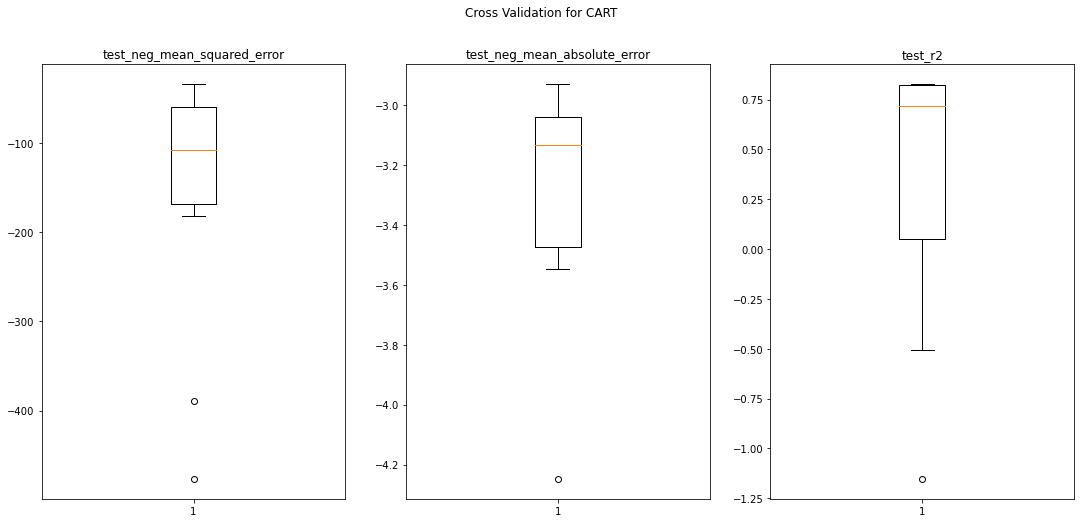

In [13]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.suptitle('Cross Validation for CART')
fig.set_size_inches(18.5, 8)
# fig.subplot(1,3)
a[0].boxplot(score1['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score1['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score1['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [14]:
# np.mean(score1)

In [15]:
m1 = (regressor,score1)

# Kernel Ridge Regression

In [16]:
from sklearn.kernel_ridge import KernelRidge

In [17]:
R = KernelRidge(alpha = 1.0)

R.fit(X_train, y_train)

# score2 = R.score(X_test,y_test)
score2 =cross_validate(R,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score2)
name.append('KRR')
score.append(score2)
# average.append(np.mean(score2))
# maximum.append(max(score2))
# minimum.append(min(score2))

{'fit_time': array([5.53022337, 5.27598691, 5.17442417, 5.11504602, 4.98183036,
       7.19469619, 7.4967525 , 7.39749479, 7.59302068, 7.35987926]), 'score_time': array([0.03330636, 0.04449463, 0.04058838, 0.03355217, 0.0256362 ,
       0.04556155, 0.03277612, 0.04261494, 0.03841567, 0.04246426]), 'test_neg_mean_squared_error': array([ -30.58704433,  -73.79634071, -169.76652596,  -35.5070559 ,
        -26.78952728,  -30.74910696,  -33.95959348, -131.44591292,
        -73.09577609, -367.14706853]), 'test_neg_mean_absolute_error': array([-2.73631016, -2.82157108, -3.25979825, -2.6928706 , -2.50138556,
       -2.82238713, -2.69649785, -3.03535977, -2.95385468, -3.69456332]), 'test_r2': array([0.4761377 , 0.86804123, 0.68474499, 0.85949884, 0.89645944,
       0.83939759, 0.88267555, 0.28962737, 0.79526962, 0.18662544])}


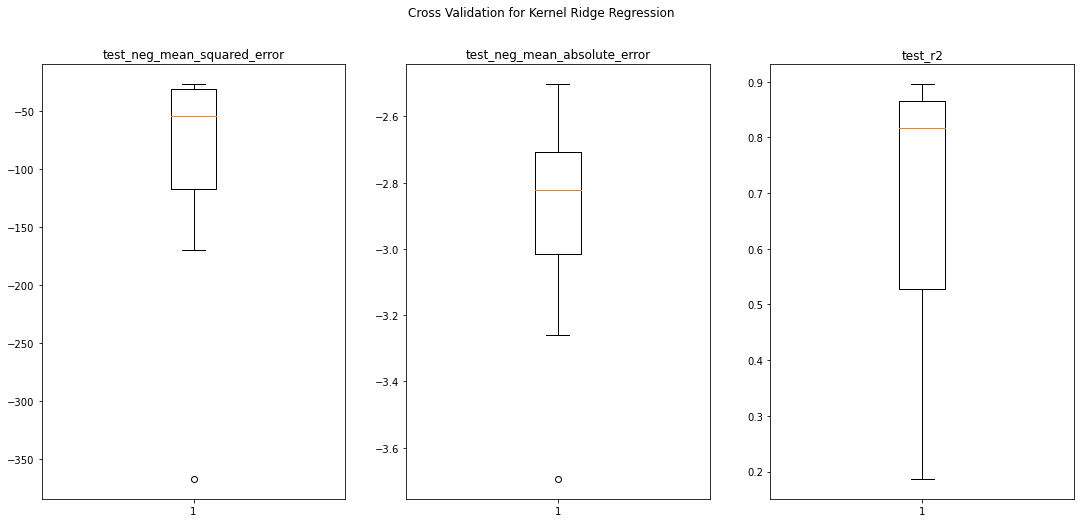

In [18]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Kernel Ridge Regression')
# fig.subplot(1,3)
a[0].boxplot(score2['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score2['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score2['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [19]:
# print(np.mean(score2))

In [20]:
m2 = (R,score2)

# K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred3 = neigh.predict(X_test)
# score3 = neigh.score(X_test,y_test)
score3 =cross_validate(neigh,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score3)
name.append('KNN')
score.append(score3)
# average.append(np.mean(score3))
# maximum.append(max(score3))
# minimum.append(min(score3))

{'fit_time': array([0.00811291, 0.00811291, 0.00811291, 0.00811291, 0.00811291,
       0.00798512, 0.0079515 , 0.0079515 , 0.0079515 , 0.        ]), 'score_time': array([0.016047  , 0.016047  , 0.00806189, 0.016047  , 0.016047  ,
       0.0079515 , 0.01603651, 0.01603651, 0.01603651, 0.01603651]), 'test_neg_mean_squared_error': array([ -23.95432345,  -84.0594034 , -142.96685926,  -43.36396966,
        -38.76692059,  -25.81476254,  -72.838182  ,  -99.00061563,
        -65.27891231, -426.93449156]), 'test_neg_mean_absolute_error': array([-2.20508199, -2.63952145, -2.77251334, -2.55035669, -2.31049148,
       -2.39420829, -2.68718014, -2.6149703 , -2.67057189, -3.63945843]), 'test_r2': array([0.58973588, 0.84968936, 0.73451174, 0.82840909, 0.85016725,
       0.86516965, 0.74835683, 0.46497137, 0.81716349, 0.05417288])}


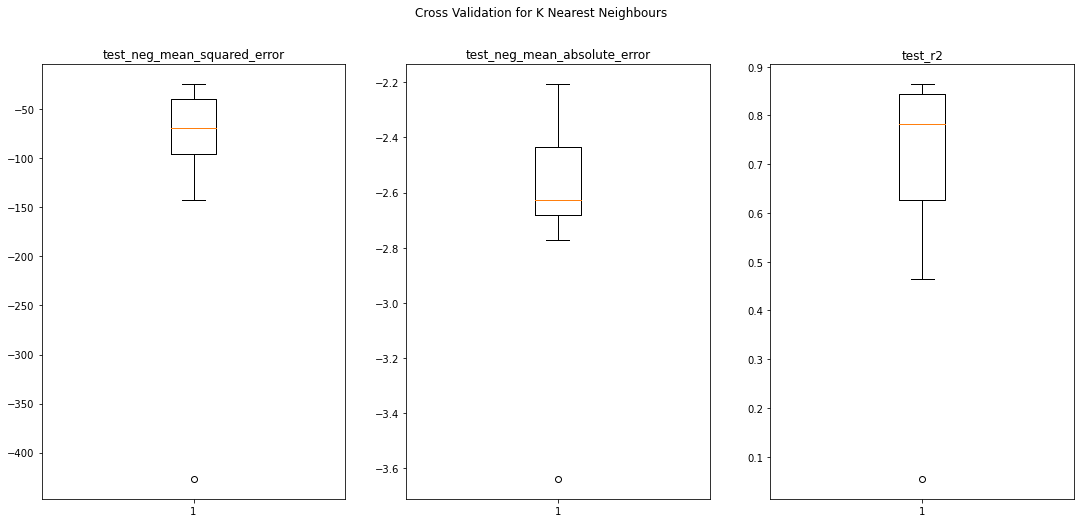

In [23]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for K Nearest Neighbours')
# fig.subplot(1,3)
a[0].boxplot(score3['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score3['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score3['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [24]:
# print(max(score3))

In [25]:
m3 = (neigh,score3)

# Ensemble Methords

# Votting Regressor

In [26]:
from sklearn.ensemble import VotingRegressor

In [27]:
eclf1 = VotingRegressor(estimators=[('cart', m1[0]), ('krr', m2[0]), ('knn', m3[0])])
eclf1.fit(X_train, y_train)

VotingRegressor(estimators=[('cart', DecisionTreeRegressor()),
                            ('krr', KernelRidge(alpha=1.0)),
                            ('knn', KNeighborsRegressor())])

In [28]:
eclf1.score(X_test,y_test)
score4 =cross_validate(eclf1,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score4)
name.append('Votting Regressor')
score.append(score4)
# average.append(np.mean(score4))
# maximum.append(max(score4))
# minimum.append(min(score4))

{'fit_time': array([8.17453408, 8.35889482, 8.47333169, 8.35089684, 8.45660996,
       8.32221198, 8.25193024, 8.48310375, 8.39199543, 8.25301433]), 'score_time': array([0.04841423, 0.04826236, 0.04197764, 0.05626035, 0.0424583 ,
       0.05796242, 0.04867625, 0.04653549, 0.04653549, 0.04798222]), 'test_neg_mean_squared_error': array([ -35.6624828 ,  -66.94232166, -155.96996524,  -20.07898599,
        -69.39256933,  -24.03503407,  -43.46056515, -104.43238055,
        -52.82691639, -406.52414627]), 'test_neg_mean_absolute_error': array([-2.44818565, -2.52109865, -2.83453033, -2.34175654, -2.44408005,
       -2.39150992, -2.45590886, -2.51904805, -2.54294104, -3.52873406]), 'test_r2': array([0.389211  , 0.88029723, 0.71036508, 0.9205476 , 0.73180022,
       0.87446516, 0.84985135, 0.4356165 , 0.85203968, 0.09938979])}


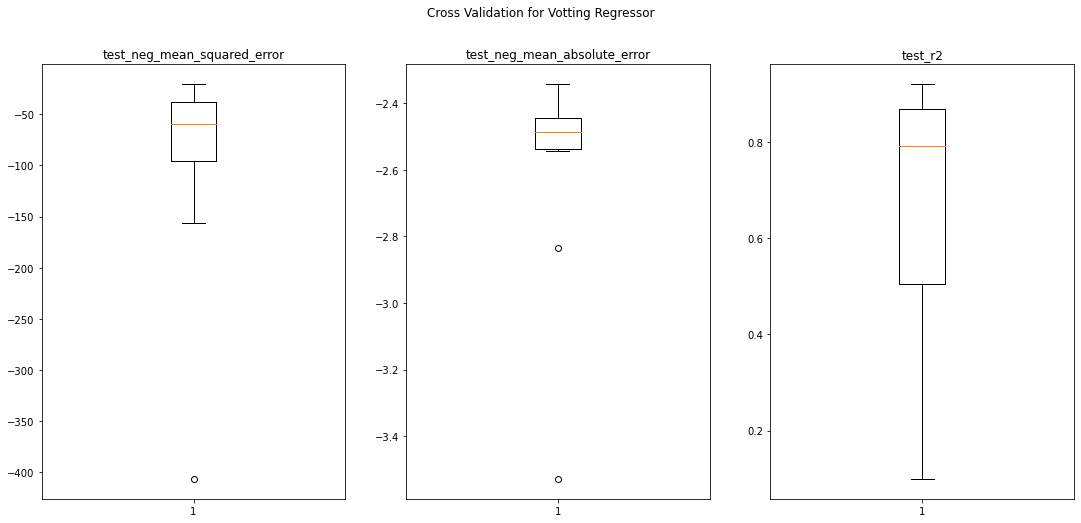

In [29]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Votting Regressor')
a[0].boxplot(score4['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score4['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score4['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [30]:
# np.mean(score4)

# Bagging - Bootstrap aggregation

In [31]:
from sklearn.ensemble import BaggingRegressor

In [32]:
# Using CART
bagging1 =  BaggingRegressor( m1[0], random_state=0)
bagging1.fit(X_train, y_train)
bagging1.score(X_test,y_test)
score5 =cross_validate(bagging1,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
name.append('Bagging using CART')
score.append(score5)
# average.append(np.mean(score5))
# maximum.append(max(score5))
# minimum.append(min(score5))
# bagging

In [33]:
# np.average(score5)

In [34]:
score5

{'fit_time': array([0.54901075, 0.51627421, 0.54094911, 0.54094911, 0.57294989,
        0.53015089, 0.54581642, 0.54641175, 0.55447268, 0.53847313]),
 'score_time': array([0.00800967, 0.00799656, 0.00800967, 0.00800967, 0.00799584,
        0.00799561, 0.00859332, 0.00806093, 0.00798941, 0.00800824]),
 'test_neg_mean_squared_error': array([ -17.78828386,  -77.22770047, -115.00753618,  -31.81073337,
        -111.26919929,  -31.58363581,  -50.76547734,  -78.35902668,
         -69.58980217, -404.50992597]),
 'test_neg_mean_absolute_error': array([-2.21879566, -2.81556232, -2.83274329, -2.38304799, -2.63899053,
        -2.45716498, -2.58675695, -2.44435796, -2.62379284, -3.55365498]),
 'test_r2': array([0.69534123, 0.86190546, 0.78643197, 0.87412516, 0.56994855,
        0.83503885, 0.82461416, 0.57652462, 0.80508933, 0.10385208])}

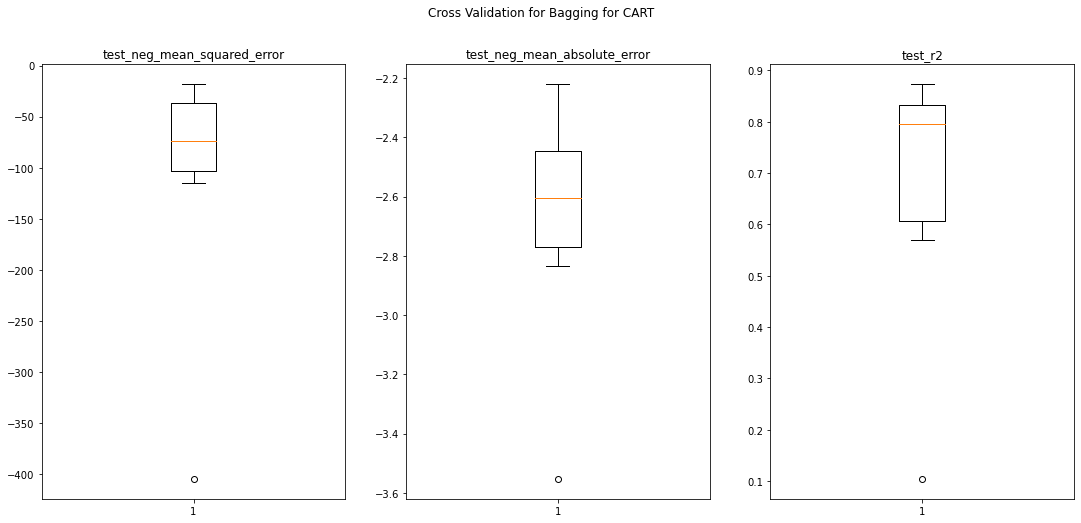

In [35]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Bagging for CART')
a[0].boxplot(score5['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score5['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score5['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [36]:
# # Using KRR
# bagging2 =  BaggingRegressor( m2[0], random_state=0)
# bagging2.fit(X_train, y_train)
# score6 =cross_val_score(bagging2,X_test,y_test, cv=5,n_jobs=5,scoring = scoring)
# bagging2.score(X_test,y_test)
# name.append('Bagging using KRR')
# score.append(score6)
# average.append(np.mean(score6))
# maximum.append(max(score6))
# minimum.append(min(score6))
# # bagging

In [37]:
# # Cross Validation
# fig = plt.figure()
# fig.suptitle('Cross Validation for Bagging with KRR')
# plt.boxplot(score1)
# plt.show()

In [38]:
# Usinf KNN
bagging3 =  BaggingRegressor( m3[0], random_state=0)
bagging3.fit(X_train, y_train)
score7 =cross_validate(bagging3,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
bagging3.score(X_test,y_test)
name.append('Bagging using KNN')
score.append(score7)
# average.append(np.mean(score7))
# maximum.append(max(score7))
# minimum.append(min(score7))
# bagging

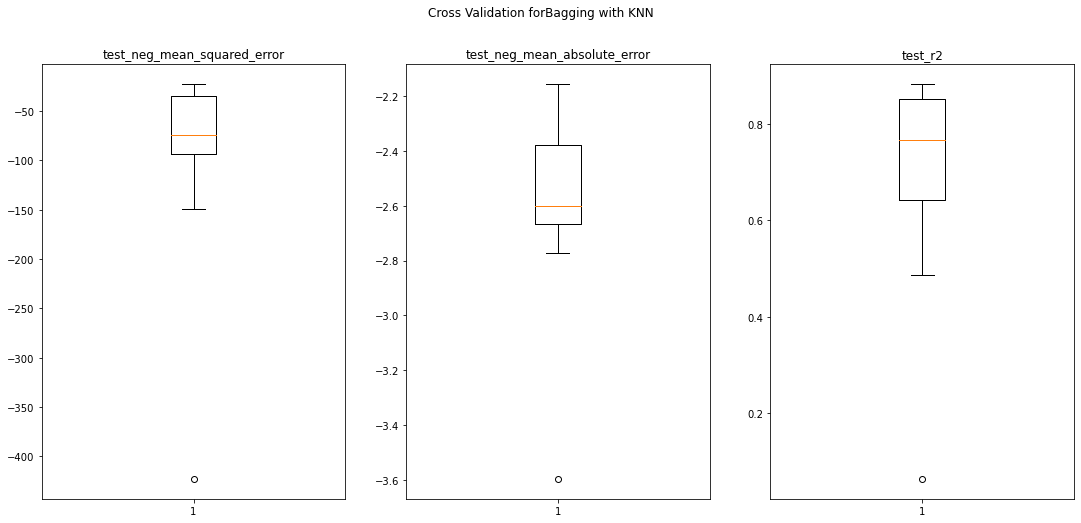

In [39]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation forBagging with KNN')
a[0].boxplot(score7['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score7['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score7['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [40]:
# bagging

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Depts is 4
regr = RandomForestRegressor(max_depth=4, random_state=0)

# Prune tree with no restriction on depth
# regr = RandomForestRegressor()

regr.fit(X_train, y_train)
regr.score(X_test,y_test)
score8 =cross_validate(regr,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
name.append('Random Forrest')
score.append(score8)
# average.append(np.mean(score8))
# maximum.append(max(score8))
# minimum.append(min(score8))

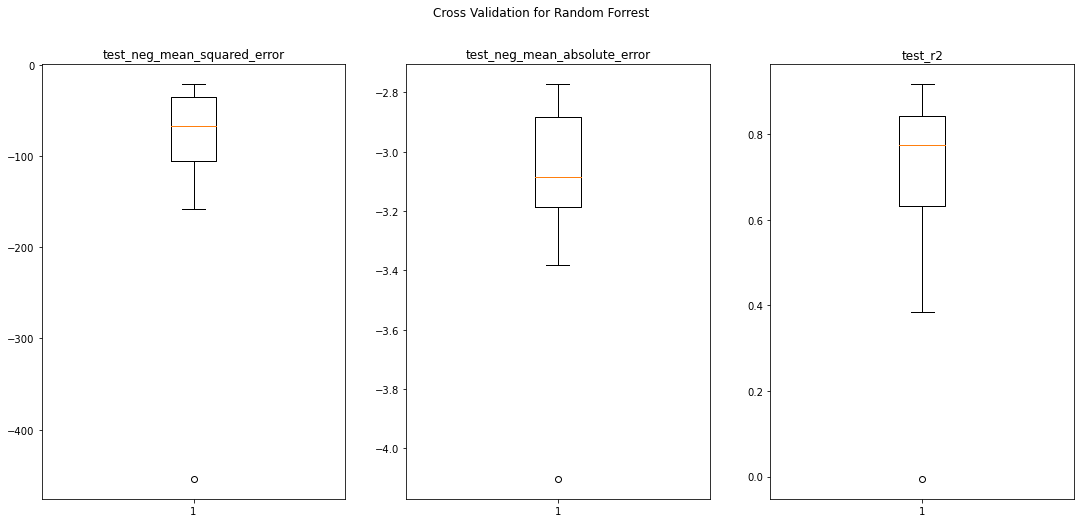

In [42]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Random Forrest')
a[0].boxplot(score8['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score8['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score8['test_r2'])
a[2].set_title('test_r2')
plt.show()

# Analysis

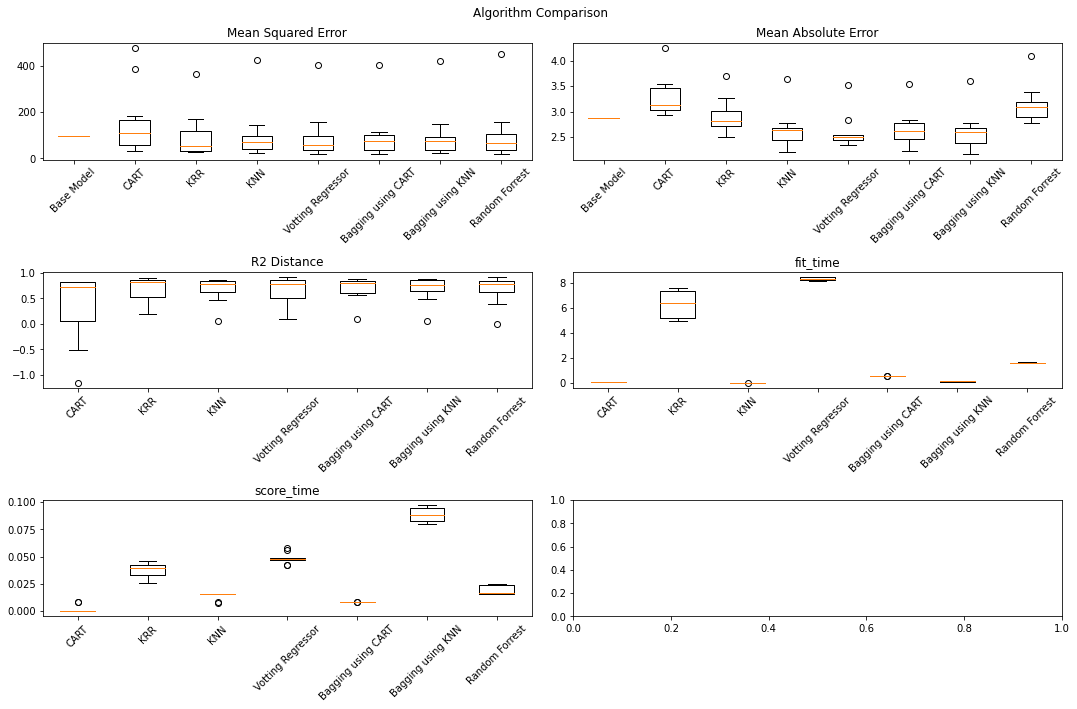

In [43]:
# boxplot algorithm comparison
fig,a = plt.subplots(3,2)
fig.set_size_inches(15, 10)
fig.suptitle('Algorithm Comparison')
# fig.set_size_inches(18.5, 10.5)

a[0][0].boxplot([rmse_old,score1['test_neg_mean_squared_error']*-1,score2['test_neg_mean_squared_error']*-1,score3['test_neg_mean_squared_error']*-1,
                score4['test_neg_mean_squared_error']*-1,score5['test_neg_mean_squared_error']*-1,score7['test_neg_mean_squared_error']*-1,
              score8['test_neg_mean_squared_error']*-1])
a[0][0].set_xticks([1,2,3,4,5,6,7,8]) #[1,2,3,4,5,6,7]
a[0][0].set_xticklabels(name,rotation = 45)
a[0][0].title.set_text('Mean Squared Error')

a[0][1].boxplot([mae_old,score1['test_neg_mean_absolute_error']*-1,score2['test_neg_mean_absolute_error']*-1,score3['test_neg_mean_absolute_error']*-1,
                score4['test_neg_mean_absolute_error']*-1,score5['test_neg_mean_absolute_error']*-1,score7['test_neg_mean_absolute_error']*-1,
             score8['test_neg_mean_absolute_error']*-1])
# a[1].plot(np.mean(mae_old))
a[0][1].set_xticks([1,2,3,4,5,6,7,8]) #[1,2,3,4,5,6,7]
a[0][1].set_xticklabels(name,rotation = 45)
a[0][1].title.set_text('Mean Absolute Error')


a[1][0].boxplot([score1['test_r2'],score2['test_r2'],score3['test_r2'],
                score4['test_r2'],score5['test_r2'],score7['test_r2'],score8['test_r2']])
a[1][0].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[1][0].set_xticklabels(name[1:],rotation = 45)
a[1][0].title.set_text('R2 Distance')


a[1][1].boxplot([score1['fit_time'],score2['fit_time'],score3['fit_time'],
                score4['fit_time'],score5['fit_time'],score7['fit_time'],score8['fit_time']])
a[1][1].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[1][1].set_xticklabels(name[1:],rotation = 45)
a[1][1].title.set_text('fit_time')


a[2][0].boxplot([score1['score_time'],score2['score_time'],score3['score_time'],
                score4['score_time'],score5['score_time'],score7['score_time'],score8['score_time']])
a[2][0].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[2][0].set_xticklabels(name[1:],rotation = 45)
a[2][0].title.set_text('score_time')
plt.tight_layout()

# ax = fig.add_subplot(111)
# plt.boxplot(score)
# ax.set_xticklabels(name)
plt.show()

In [44]:
# fig = plt.figure()
# fig.suptitle('MAximum')
# ax = fig.add_subplot(111)
# plt.plot(name,maximum)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

In [45]:
# fig = plt.figure()
# fig.suptitle('minimum')
# ax = fig.add_subplot(111)
# plt.plot(name,minimum)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

In [46]:
# fig = plt.figure()
# fig.suptitle('Average')
# ax = fig.add_subplot(111)
# plt.plot(name,average)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

# Model Comparison (Not Sure)

In [47]:
predict_CART = regressor.predict(X_test)
predict_KRR = R.predict(X_test)
predict_KNN = neigh.predict(X_test)
predict_VoReg = eclf1.predict(X_test)
predict_BaggingCART = bagging1.predict(X_test)
predict_BaggingKNN =bagging3.predict(X_test)
predict_RanFor = regr.predict(X_test)

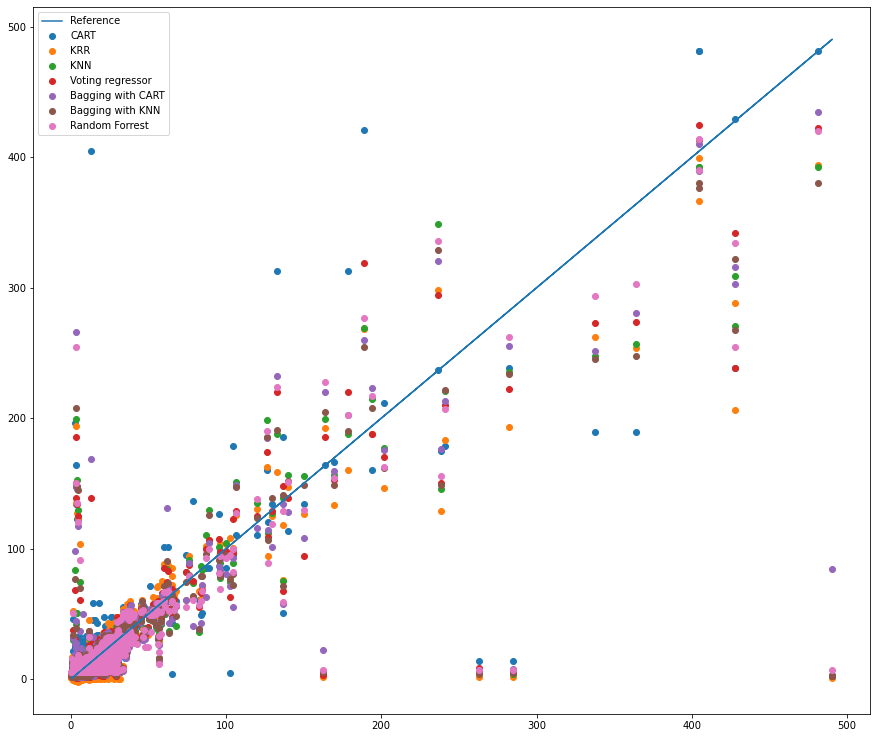

In [48]:
fig = plt.figure()
fig.set_size_inches(15, 13)
plt.scatter(y_test,predict_CART,label='CART')
plt.scatter(y_test,predict_KRR,label='KRR')
plt.scatter(y_test,predict_KNN,label='KNN')
plt.scatter(y_test,predict_VoReg,label='Voting regressor')
plt.scatter(y_test,predict_BaggingCART,label='Bagging with CART')
plt.scatter(y_test,predict_BaggingKNN,label='Bagging with KNN')
plt.scatter(y_test,predict_RanFor,label='Random Forrest')
plt.plot(y_test,y_test,label='Reference')
plt.legend(loc="upper left")
plt.show()

In [49]:
X_test

array([[64.05181818, 28.39772727,  6.73272727],
       [84.43235294, 59.63764706, 16.03117647],
       [80.739375  , 43.16625   , 13.39875   ],
       ...,
       [70.62333333, 32.8575    ,  2.90916667],
       [76.93086957, 44.82652174, 20.95869565],
       [47.0526087 , 50.73      ,  6.97521739]])

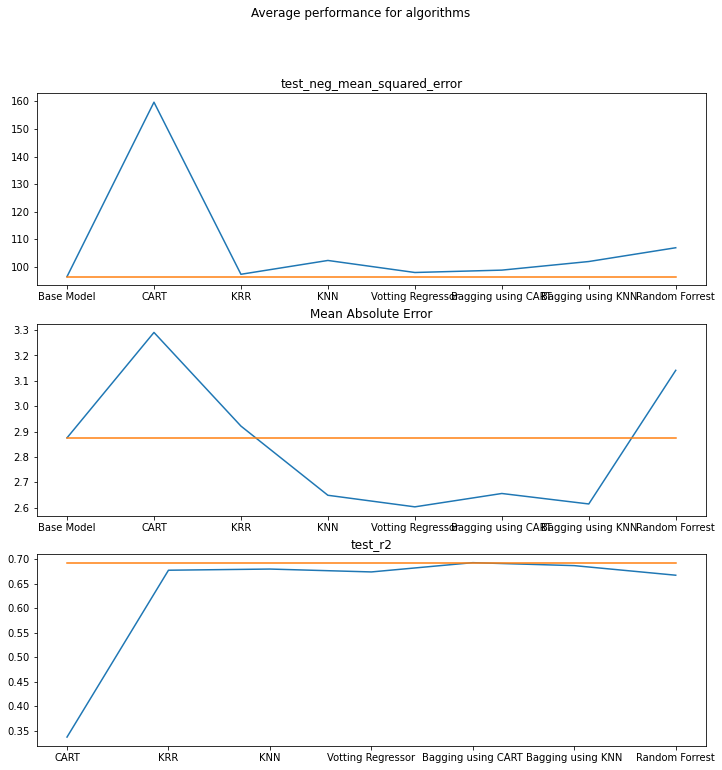

In [50]:
fig,a = plt.subplots(3,1)
fig.suptitle('Average performance for algorithms')
# plt.title('Average test_neg_mean_squared_error')
fig.set_size_inches(12, 12)
a[0].plot(name,[rmse_old,np.mean(score1['test_neg_mean_squared_error']*-1),np.mean(score2['test_neg_mean_squared_error']*-1),np.mean(score3['test_neg_mean_squared_error']*-1),
                np.mean(score4['test_neg_mean_squared_error']*-1),np.mean(score5['test_neg_mean_squared_error']*-1),np.mean(score7['test_neg_mean_squared_error']*-1),
              np.mean(score8['test_neg_mean_squared_error']*-1)])
a[0].plot([rmse_old]*8)
a[0].title.set_text('test_neg_mean_squared_error')

a[1].plot(name,[mae_old,np.mean(score1['test_neg_mean_absolute_error']*-1),np.mean(score2['test_neg_mean_absolute_error']*-1),np.mean(score3['test_neg_mean_absolute_error']*-1),
                np.mean(score4['test_neg_mean_absolute_error']*-1),np.mean(score5['test_neg_mean_absolute_error']*-1),np.mean(score7['test_neg_mean_absolute_error']*-1),
              np.mean(score8['test_neg_mean_absolute_error'])*-1])
a[1].plot([mae_old]*8)
a[1].title.set_text('Mean Absolute Error')


a[2].plot(name[1:],[np.mean(score1['test_r2']),np.mean(score2['test_r2']),np.mean(score3['test_r2']),
                np.mean(score4['test_r2']),np.mean(score5['test_r2']),np.mean(score7['test_r2']),
              np.mean(score8['test_r2'])])
a[2].plot([r2_old]*7)
a[2].title.set_text('test_r2')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

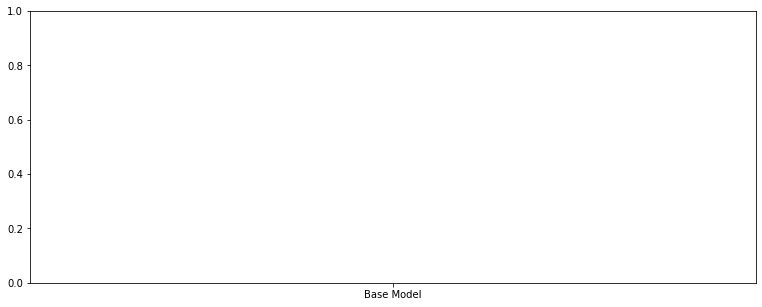

In [51]:
# import matplotlib.pyplot as plt
fig =plt.figure()
fig.set_size_inches(13, 5)
# fig.title('Mean Absolute Error')
plt.plot(name,[np.mean(score1['test_neg_mean_absolute_error']*-1),np.mean(score2['test_neg_mean_absolute_error']*-1),np.mean(score3['test_neg_mean_absolute_error']*-1),
                np.mean(score4['test_neg_mean_absolute_error']*-1),np.mean(score5['test_neg_mean_absolute_error']*-1),np.mean(score7['test_neg_mean_absolute_error']*-1),
              np.mean(score8['test_neg_mean_absolute_error'])*-1],label = 'ML Models')
plt.plot([mae_old]*7, label = 'Base Model')
plt.legend(loc="upper right")


In [ ]:
fig.subtitle('dd')

In [52]:
import pandas as pd

In [77]:
r1 =[rmse_old,np.median(score1['test_neg_mean_squared_error']*-1),np.median(score2['test_neg_mean_squared_error']*-1),np.median(score3['test_neg_mean_squared_error']*-1),
                np.median(score4['test_neg_mean_squared_error']*-1),np.median(score5['test_neg_mean_squared_error']*-1),np.median(score7['test_neg_mean_squared_error']*-1),
              np.median(score8['test_neg_mean_squared_error']*-1)]
r1 =[round(x,2) for x in r1]
r2 =[mae_old,np.median(score1['test_neg_mean_absolute_error']*-1),np.median(score2['test_neg_mean_absolute_error']*-1),np.median(score3['test_neg_mean_absolute_error']*-1),
                np.median(score4['test_neg_mean_absolute_error']*-1),np.median(score5['test_neg_mean_absolute_error']*-1),np.median(score7['test_neg_mean_absolute_error']*-1),
              np.median(score8['test_neg_mean_absolute_error'])*-1]
r2 =[round(x,2) for x in r2]
r3 =[np.median(score1['test_r2']),np.median(score2['test_r2']),np.median(score3['test_r2']),
                np.median(score4['test_r2']),np.median(score5['test_r2']),np.median(score7['test_r2']),
              np.median(score8['test_r2'])]
r3 =[round(x,2) for x in r3]
r3.insert(0,'NA')
r4 =[np.median(score1['fit_time']),np.median(score2['fit_time']),np.median(score3['fit_time']),
                np.median(score4['fit_time']),np.median(score5['fit_time']),np.median(score7['fit_time']),
              np.median(score8['fit_time'])]
r4 =[round(x,2) for x in r4]
r4.insert(0,'NA')
r5 =[np.median(score1['score_time']),np.median(score2['score_time']),np.median(score3['score_time']),
                np.median(score4['score_time']),np.median(score5['score_time']),np.median(score7['score_time']),
              np.median(score8['score_time'])]
r5 =[round(x,2) for x in r5]
r5.insert(0,'NA')

In [78]:
df =pd.DataFrame(np.array([r1,r2,r3,r4,r5]),columns = name)

In [86]:
df['Metric'] = ['Mean Squared Error','Mean Absolute Error','R2 Distance','Fit Time','Score Time']

In [87]:
df.set_index('Metric',drop=True,inplace=True)

In [88]:
df

,Base Model,CART,KRR,KNN,Votting Regressor,Bagging using CART,Bagging using KNN,Random Forrest
Metric,,,,,,,,
Mean Squared Error,96.44,107.96,54.3,69.06,59.88,73.41,74.1,66.99
Mean Absolute Error,2.88,3.13,2.82,2.63,2.49,2.61,2.6,3.09
R2 Distance,NA,0.72,0.82,0.78,0.79,0.8,0.77,0.78
Fit Time,NA,0.06,6.36,0.01,8.35,0.54,0.1,1.6
Score Time,NA,0.0,0.04,0.02,0.05,0.01,0.09,0.02


In [85]:
df.to_csv('Results.csv')